In [3]:
import numpy as np 
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


import os
for dirname, _, filenames in os.walk('/Users/habaokhanh/Documents/Data/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/habaokhanh/Documents/Data/kaggle/US  E-commerce records 2020.csv


In [5]:
df_ecom = pd.read_csv('/Users/habaokhanh/Documents/Data/kaggle/US  E-commerce records 2020.csv', encoding='windows-1252')
df_ecom.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


# EDA

In [6]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [7]:
df_ecom.apply(lambda x: sum(x.isna()))

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Cohort calculation

In [8]:
df_ecom['Order Date'] = pd.to_datetime(df_ecom['Order Date'])

print('Min date: {} \nMax date: {}'.format(df_ecom['Order Date'].min(), df_ecom['Order Date'].max()))
print('Time difference is: {}'.format(df_ecom['Order Date'].max() - df_ecom['Order Date'].min()))

Min date: 2020-01-01 00:00:00 
Max date: 2020-12-30 00:00:00
Time difference is: 364 days 00:00:00


This dataset recorded exact 1 year of online purchases, and thus is applicable for a monthly cohort analysis.

In [9]:
#Getting customer's first activity 
def get_month(x): 
    return dt.datetime(x.year, x.month, 1) 

df_ecom['Trans Month'] = df_ecom['Order Date'].apply(get_month)
df_ecom['1st Trans Month'] = pd.to_datetime(df_ecom.groupby('Customer ID')['Trans Month'].transform('min'))

df_ecom.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Trans Month,1st Trans Month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,2020-01-01,2020-01-01
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,2020-01-01,2020-01-01
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,2020-01-01,2020-01-01
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,2020-01-01,2020-01-01
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,2020-01-01,2020-01-01


In [10]:
#Calculate month difference
def month_diff(start, end):
    return (end.dt.year - start.dt.year)*12 + end.dt.month - start.dt.month

df_ecom['Month Diff'] = month_diff(df_ecom['1st Trans Month'], df_ecom['Trans Month'])


df_ecom[['Customer ID', 'Trans Month', '1st Trans Month', 'Month Diff']]

,Customer ID,Trans Month,1st Trans Month,Month Diff
0,GA-14725,2020-01-01,2020-01-01,0
1,SC-20725,2020-01-01,2020-01-01,0
2,DP-13390,2020-01-01,2020-01-01,0
3,JM-15250,2020-01-01,2020-01-01,0
4,JM-15250,2020-01-01,2020-01-01,0
...,...,...,...,...
3307,PO-18865,2020-12-01,2020-05-01,7
3308,PO-18865,2020-12-01,2020-05-01,7
3309,EB-13975,2020-12-01,2020-12-01,0
3310,EB-13975,2020-12-01,2020-12-01,0


In [11]:
#Calculate number of customers in each segment
df_cohort = df_ecom.groupby(['1st Trans Month', 'Month Diff'])['Customer ID'].apply(pd.Series.nunique).reset_index()

df_cohort.head()

,1st Trans Month,Month Diff,Customer ID
0,2020-01-01,0,96
1,2020-01-01,1,10
2,2020-01-01,2,18
3,2020-01-01,3,23
4,2020-01-01,4,7


In [12]:
#Pivot the cohort table
df_cohort.pivot(index='1st Trans Month', columns='Month Diff', values='Customer ID')

Month Diff,0,1,2,3,4,5,6,7,8,9,10,11
1st Trans Month,,,,,,,,,,,,
2020-01-01,96.0,10.0,18.0,23.0,7.0,13.0,11.0,19.0,22.0,13.0,17.0,19.0
2020-02-01,90.0,13.0,13.0,8.0,11.0,15.0,15.0,18.0,15.0,23.0,15.0,NaN
2020-03-01,111.0,24.0,13.0,17.0,18.0,10.0,22.0,17.0,26.0,20.0,NaN,NaN
2020-04-01,65.0,14.0,14.0,11.0,12.0,19.0,11.0,18.0,14.0,NaN,NaN,NaN
2020-05-01,63.0,9.0,7.0,10.0,10.0,9.0,19.0,13.0,NaN,NaN,NaN,NaN
2020-06-01,56.0,6.0,12.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,42.0,9.0,9.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,29.0,5.0,6.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,48.0,9.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above cohort table interprets customership retention over months. In detail, 96 customers made their first transactions in Jan 2020, we say their cohort month is 2020-01 and cohort index is 0. Looking at the next right cell, there were 10 unique customers among 96 decided to make other purchases after one month.

From this point, let's examine how the retention rate is.

In [13]:
df_new_cus = df_cohort.loc[df_cohort['Month Diff']==0, ['1st Trans Month', 'Customer ID']]

df_new_cus.rename(columns={'Customer ID' : 'New Cus'}, inplace=True)

df_new_cus.head()

,1st Trans Month,New Cus
0,2020-01-01,96
12,2020-02-01,90
23,2020-03-01,111
33,2020-04-01,65
42,2020-05-01,63


In [14]:
df_retention = pd.merge(df_cohort, df_new_cus, how='left', on='1st Trans Month')

df_retention.head()

,1st Trans Month,Month Diff,Customer ID,New Cus
0,2020-01-01,0,96,96
1,2020-01-01,1,10,96
2,2020-01-01,2,18,96
3,2020-01-01,3,23,96
4,2020-01-01,4,7,96


In [15]:
df_retention['Retention Rate'] = df_retention['Customer ID'] / df_retention['New Cus']

df_retention.head()

,1st Trans Month,Month Diff,Customer ID,New Cus,Retention Rate
0,2020-01-01,0,96,96,1.000000
1,2020-01-01,1,10,96,0.104167
2,2020-01-01,2,18,96,0.187500
3,2020-01-01,3,23,96,0.239583
4,2020-01-01,4,7,96,0.072917


In [16]:
retention = df_retention.pivot(index='1st Trans Month', columns='Month Diff', values='Retention Rate')

retention.index = retention.index.strftime("%Y-%m")

retention

Month Diff,0,1,2,3,4,5,6,7,8,9,10,11
1st Trans Month,,,,,,,,,,,,
2020-01,1.0,0.104167,0.187500,0.239583,0.072917,0.135417,0.114583,0.197917,0.229167,0.135417,0.177083,0.197917
2020-02,1.0,0.144444,0.144444,0.088889,0.122222,0.166667,0.166667,0.200000,0.166667,0.255556,0.166667,NaN
2020-03,1.0,0.216216,0.117117,0.153153,0.162162,0.090090,0.198198,0.153153,0.234234,0.180180,NaN,NaN
2020-04,1.0,0.215385,0.215385,0.169231,0.184615,0.292308,0.169231,0.276923,0.215385,NaN,NaN,NaN
2020-05,1.0,0.142857,0.111111,0.158730,0.158730,0.142857,0.301587,0.206349,NaN,NaN,NaN,NaN
2020-06,1.0,0.107143,0.214286,0.232143,0.178571,0.214286,0.196429,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.214286,0.214286,0.095238,0.166667,0.119048,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.172414,0.206897,0.172414,0.241379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.187500,0.312500,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


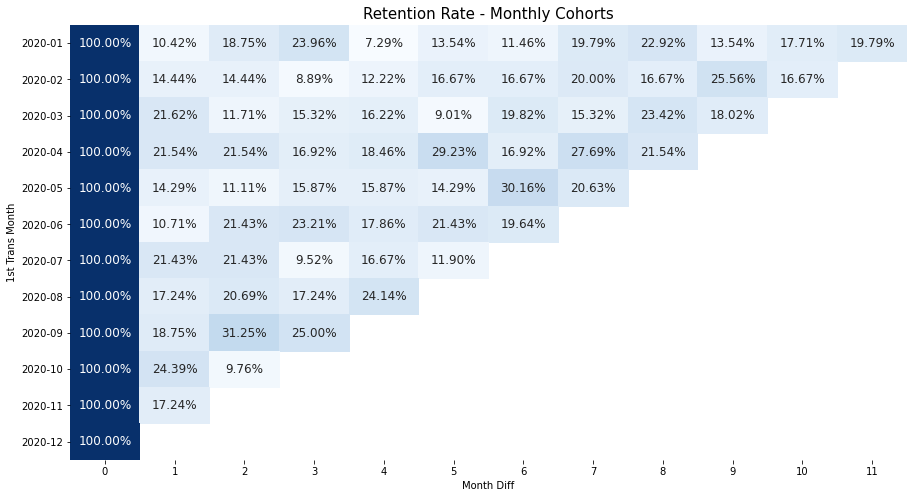

In [17]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))

sns.heatmap(retention, cmap = 'Blues', annot = True, fmt = '.2%', annot_kws = {'fontsize': 12}, cbar = False, ax = ax)

plt.title('Retention Rate - Monthly Cohorts', fontsize=15)
plt.yticks(rotation = 0)
plt.show()

In the customer group who made a purchase in January 2020, 19.79% of them decided to order again after 12 months.

Let's have a look at the monthly retention rate of all customers.

In [18]:
customer_per_month = df_ecom.groupby('1st Trans Month')['Customer ID'].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]
customers

array([693, 670, 641, 600, 552, 523, 481, 425, 362, 297, 186,  96])

In [19]:
customers_monthly = df_ecom.groupby('Month Diff')['Customer ID'].nunique()
customers_monthly

Month Diff
0     693
1     114
2     111
3     103
4      82
5      83
6      89
7      85
8      77
9      56
10     32
11     19
Name: Customer ID, dtype: int64

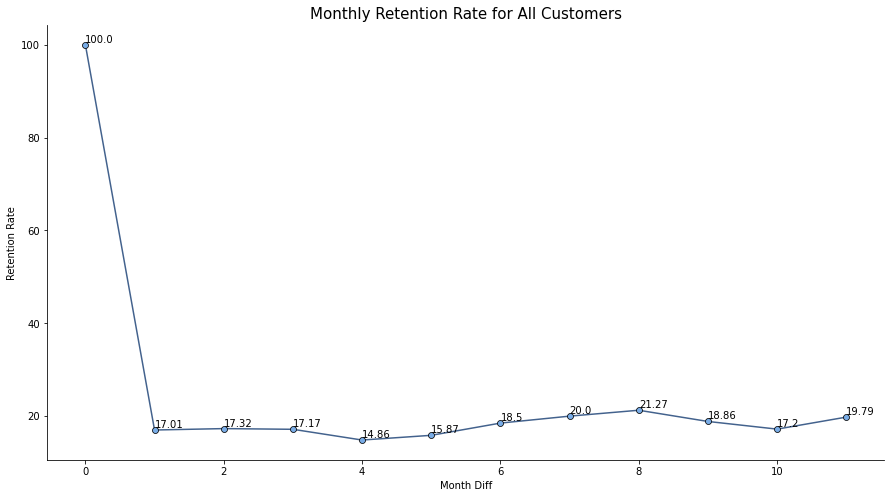

In [20]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))
ax.grid(False)
x = customers_monthly.index
y = 100*(customers_monthly / customers)

sns.lineplot(x = x, y = y, color = '#43628d', marker = 'o', markerfacecolor = '#79ace6', markeredgecolor = '#000000')

for x, y in zip(x, y):
    plt.text(x, y +0.5, s = round(y, 2))

plt.xlabel('Month Diff')
plt.ylabel('Retention Rate')
plt.title('Monthly Retention Rate for All Customers', fontsize=15)
sns.despine()
plt.show()

Retention rates fluctuated month to month but they seems quite stable in general. The percentages had only dropped in month 4th, 9th and 10th, then recovered right after that.

# Quick look at monthly revenue

In [21]:
monthly_gross = df_ecom.groupby('Trans Month').agg({'Sales': 'sum',
                                                            'Customer ID': 'nunique'})

monthly_gross

,Sales,Customer ID
Trans Month,,
2020-01-01,64734.3110,96
2020-02-01,50011.4894,100
2020-03-01,74774.0838,142
2020-04-01,39072.0016,125
2020-05-01,40882.4464,105
2020-06-01,47742.3255,120
2020-07-01,54382.0875,110
2020-08-01,75675.3040,116
2020-09-01,74164.6080,166


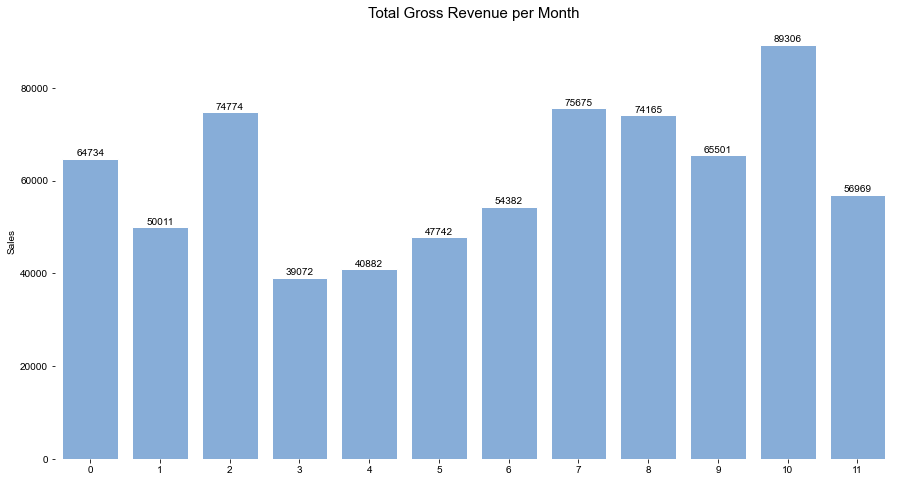

In [22]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.set_style('whitegrid')

chart = sns.barplot(x = np.arange(len(monthly_gross.index)), y = monthly_gross.Sales, ax = ax,
           color = '#79ace6')

for y in chart.patches:
             chart.annotate('%.0f' % y.get_height(), (y.get_x() + y.get_width() / 2., y.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.title('Total Gross Revenue per Month', fontsize=15)

sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

As shown in the bar chart, sales volume in September (index 10) was the highest among other months in the year.

Let's examine the net profit.

In [23]:
monthly_net = df_ecom.groupby('Trans Month').agg({'Profit': 'sum',
                                                            'Customer ID': 'nunique'})

monthly_net

,Profit,Customer ID
Trans Month,,
2020-01-01,10879.4151,96
2020-02-01,4243.9720,100
2020-03-01,18127.8605,142
2020-04-01,-5890.0374,125
2020-05-01,7567.3914,105
2020-06-01,7396.3759,120
2020-07-01,4997.9408,110
2020-08-01,11767.3512,116
2020-09-01,9221.4166,166


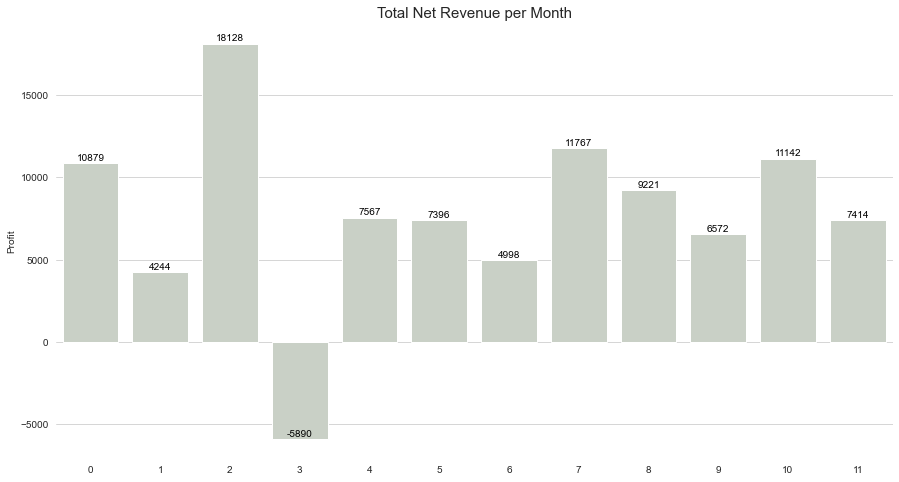

In [24]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.set_style('whitegrid')

chart = sns.barplot(x = np.arange(len(monthly_net.index)), y = monthly_net.Profit, ax = ax,
           color = '#c8d2c4')

for y in chart.patches:
             chart.annotate('%.0f' % y.get_height(), (y.get_x() + y.get_width() / 2., y.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.title('Total Net Revenue per Month', fontsize=15)

sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

A lot of discounts were applied in April, making it the only loss-making month of the year.

Compared with the previous monthly retention rate table, this campaign might only affected the customer group who made their first purchase in January, with the retention rate in the 3rd month being 23.96%. Having said that, the figures were fairly normal in other groups.